In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

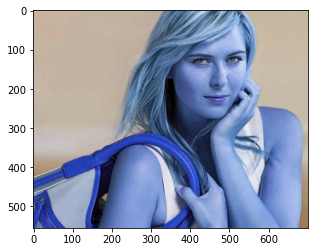

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

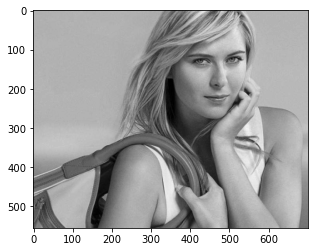

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')


faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]])

In [8]:
(x,y,w,h) = faces[0]
faces[0]

array([352,  38, 233, 233])

In [9]:
face_image = cv2.rectangle(img,(x,y),((x+w),(y+h)),(299,0,0),2)

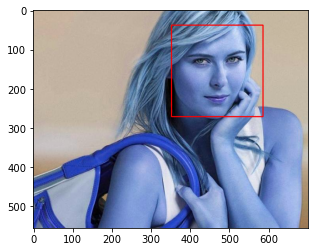

In [10]:
plt.imshow(face_image)

<function matplotlib.pyplot.show(close=None, block=None)>

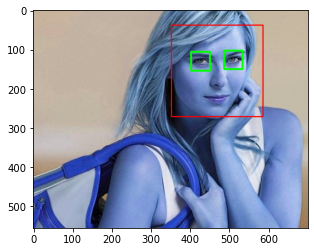

In [11]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h),(255, 0, 0), 2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    #-- In each face, detect eyes
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (x2,y2,w2,h2) in eyes:
        cv2.rectangle(roi_color, (x2,y2), (x2+w2, y2+h2) ,(0,255, 0 ), 4)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show

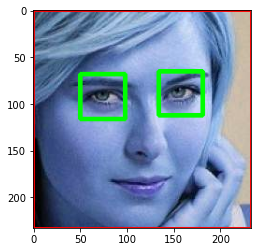

In [12]:
plt.imshow(roi_color,cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

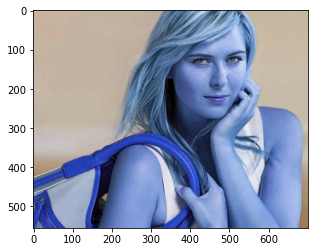

In [14]:
orginal_imge = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(orginal_imge)

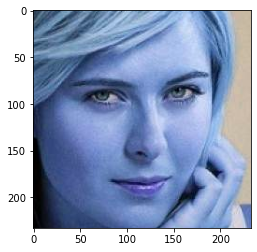

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

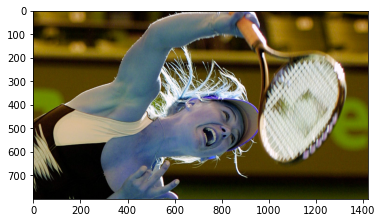

In [16]:
orginal_imge_2 = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(orginal_imge_2)

In [17]:
cropped_image_two = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_two

In [18]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [27]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
path_to_cr_data

'./dataset/cropped/'

In [30]:
cropped_image_dirs = []
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_name_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder:",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder +'/'+ cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count+= 1

lionel_messi
generating cropped images in folder: ./dataset/cropped/lionel_messi
maria_sharapova
generating cropped images in folder: ./dataset/cropped/maria_sharapova
roger_federer
generating cropped images in folder: ./dataset/cropped/roger_federer
serena_williams
generating cropped images in folder: ./dataset/cropped/serena_williams
virat_kohli
generating cropped images in folder: ./dataset/cropped/virat_kohli
